<a href="https://colab.research.google.com/github/JHaddyJ/ML/blob/main/Lab02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Import the Libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model

In [ ]:
#Import the dataset
res_Rating = pd.read_csv('/content/drive/MyDrive/CSC340/ResturantRatings.csv')

# Exploratory Data Analysis

We will learn about the 'ResturantRatings' dataset to gain insight into the data and identify patterns and relationships that may exist.

In [ ]:
#Dimesions of the data
res_Rating.shape

(15, 5)

The dataset contains 15 rows/values and 5 columns/attributes including the target attribute.

Info:
> The dimensions indicate a low-data dataset.

In [ ]:
#Checking data types per attribute
res_Rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   restaurant  15 non-null     int64
 1   food        15 non-null     int64
 2   ambience    15 non-null     int64
 3   service     15 non-null     int64
 4   rating      15 non-null     int64
dtypes: int64(5)
memory usage: 728.0 bytes


The values of each attribute are numerical and there are no missing values in the dataset.

Info:

> It is a fully populated dataset.

In [ ]:
#View the first 5 rows of the data
res_Rating.head()

,restaurant,food,ambience,service,rating
0,1,85,82,89,78
1,2,80,90,80,85
2,3,83,86,83,85
3,4,70,96,75,72
4,5,68,80,78,75


Background information of "RestaaurantRating":
> Each row represents the average rating of a restaurant's different aspects as provided by previous customers.

> The dataset contains the following attributes: ambience, food, service, and overall rating.

> The first 3 attributes are predictor features and the last one is the outcome.

From the view of the first 5 rows, we can see that 'restaurant' attribute is not needed for the ML algortihm since it represents the different customers who made the ratings.

Info:
> The target attribute is 'rating' and the features are 'food', 'ambience' and 'service'.

In [ ]:
#create new dataframe of the dataset with the useful attributes to reduce noise
res_Ratingmod = res_Rating.drop(['restaurant'], axis =1)
res_Ratingmod.head()

,food,ambience,service,rating
0,85,82,89,78
1,80,90,80,85
2,83,86,83,85
3,70,96,75,72
4,68,80,78,75


The values of the attributes appear to be similar / within the same range. There is no huge visible difference in the values of the attributes. The numbers are close to each other.
> We will compute the stats to further verify if it applies to the whole dataset.

In [ ]:
#Summary statistics of the dataset
res_Ratingmod.describe()

,food,ambience,service,rating
count,15.000000,15.000000,15.000000,15.000000
mean,73.133333,81.733333,75.133333,73.066667
std,6.555986,9.786774,8.069932,8.319226
min,64.000000,68.000000,56.000000,54.000000
25%,68.500000,71.000000,73.500000,70.500000
50%,72.000000,82.000000,78.000000,74.000000
75%,77.500000,90.000000,78.000000,77.500000
max,85.000000,96.000000,89.000000,85.000000


The statistics of the features fall under close ranges. The range of each statistical calculation between the features falls under 15. The range of the mean calculation between the features is approximately 8.7.

Info:
> The dataset has similar scales.

We will check the correlation of the attributes to determine the contributors / useful independent features necessary for the development of the prediction models in the next stages.

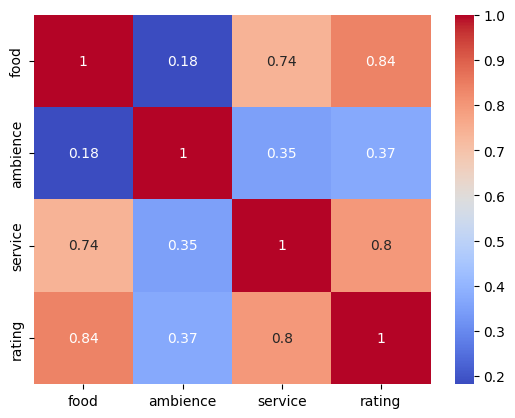

In [ ]:
#correlation plot
corr_matrix = res_Ratingmod.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

The correlation of 'rating' vs 'ambience' and 'service' vs 'ambience' are the lowest. Which indicates no correlation between those attributes since they are closest to 0.

The attribute, 'ambience', is not correlated to any of the attributes.

The correlation of 'rating' vs 'food' is the highest and it is a positive correlation, followed by the correlation of 'rating' vs 'service'. Additionally, the correlation 'service' vs 'food' is positive.

Info:
> The feature 'ambience' is not correlated to any of the features. So could be excluded from further analysis.

> The features 'food' and 'service' show a positive correlation between themselves and the target,' rating', thus will be used for further analysis.

The variable 'food' appears to have the strongest correlation with 'rating'. We will check if there are any outliers with the values to better help with model development and outlier identification.

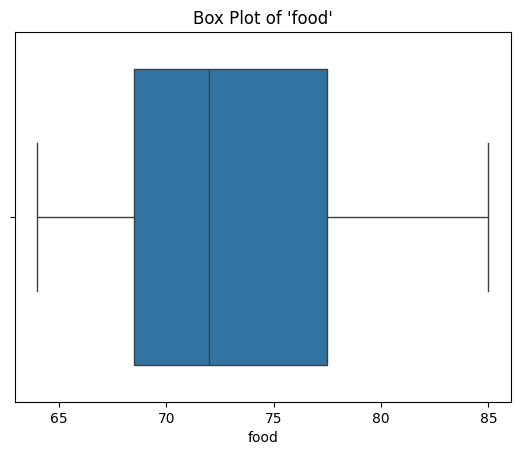

In [ ]:
#Boxplot of 'food'
sns.boxplot(x = res_Ratingmod['food'])
plt.title("Box Plot of 'food'")
plt.show()

Info:
> There are no outliers in the 'food' data.

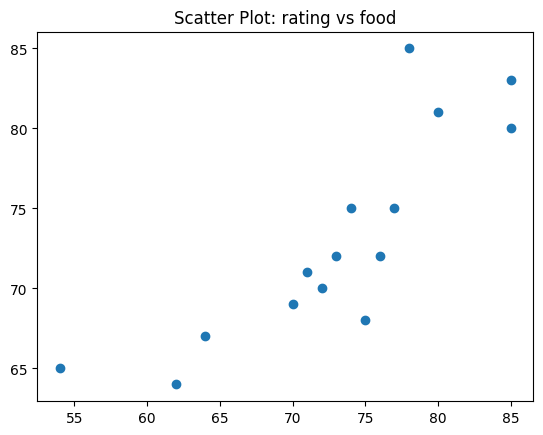

In [ ]:
#Scatter plot of 'rating' and 'food'
plt.scatter(res_Ratingmod['rating'], res_Ratingmod['food'])
plt.title('Scatter Plot: rating vs food')
plt.show()

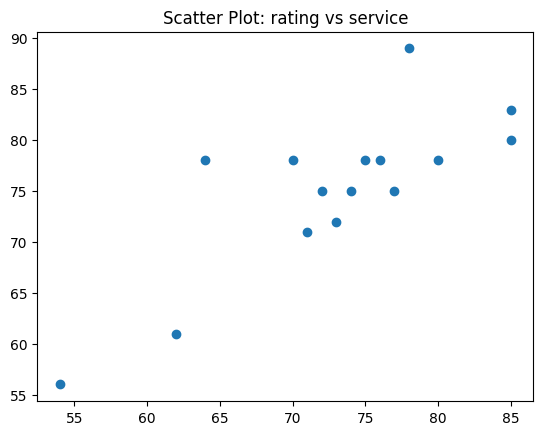

In [ ]:
#Scatter plot of 'rating' and 'service'
plt.scatter(res_Ratingmod['rating'], res_Ratingmod['service'])
plt.title('Scatter Plot: rating vs service')
plt.show()

Info:
> The scatter of 'food' vs 'rating' follows a more linear path than that of 'service' vs 'rating'. This emphasizes the 'food' attribute has the strongest correlation with the target value than the 'service' attribute.

**EDA Conclusion**

 > The dataset contains low-data: dimensions (15,5), and it is a fully populated dataset with no missing values.

 > The relevant attributes are 'rating', 'food', and 'service'; they indicated a positive correlation among themselves: as one attribute increases in value, the other attribute also increases in value.

 > The restaurant ratings by the customers were highly influenced by food, followed by the service of the restaurant.

> For regression purposes, we will use 'rating' and 'food' to train the simple linear regression model and 'service' and 'rating' since they showed the highest correlation with 'rating'. Additionally, we will use 'food' and 'service' vs 'rating' to train the multiple linear regression model.

# Project A: Simple Linear Regression

Model I: We will build the regression model using y = 'rating' and x = 'food', since they yield a positive correlation and the highest out of all the other features.

We will find a linear relationship between 'food' and 'rating' by estimating the values of intercept and constant (y = mX + c).

In [ ]:
#Extract the independent feature
X = res_Ratingmod['food']

In [ ]:
#Extract the dependent feature
y = res_Ratingmod['rating']

In [ ]:
#Add the constant term to the predictor
X = sm.add_constant(X)

In [ ]:
# Train the Linear Regression model using OLS
modelI = sm.OLS(y,X).fit()

In [ ]:
#Look at the model using the summary method
print(modelI.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     30.98
Date:                Mon, 11 Mar 2024   Prob (F-statistic):           9.13e-05
Time:                        01:33:25   Log-Likelihood:                -43.404
No. Observations:                  15   AIC:                             90.81
Df Residuals:                      13   BIC:                             92.22
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.8228     14.046     -0.343      0.7

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Info:
> From the above model, food and rating are related by the equation:     
     rating = (1.0650 * food) - 4.8228.



In [ ]:
#Predict the rating using the built model
y_hat = modelI.predict(X)

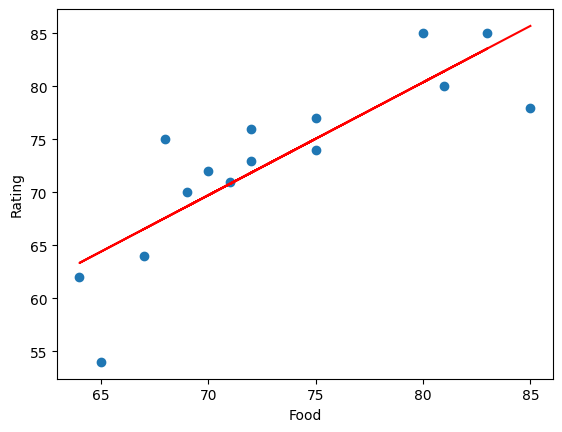

In [ ]:
#Visualize the relationship
plt.scatter(X.food, y)
plt.xlabel("Food")
plt.ylabel("Rating")
plt.plot(X.food, y_hat, "red")

Model II: We will build the regression model using y = 'rating' and x = 'service' since they also yield a positive correlation.

We will find a linear relationship between 'service' and 'rating' by estimating the values of intercept and constant (y = mX + c).

In [ ]:
#Extract the independent feature
X = res_Ratingmod['service']

In [ ]:
#Extract the dependent feature
y = res_Ratingmod['rating']

In [ ]:
#Add the constant term to the predictor
X = sm.add_constant(X)

In [ ]:
# Train the Linear Regression model using OLS
modelII = sm.OLS(y,X).fit()

In [ ]:
#Look at the model using the summary method
print(modelII.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     22.60
Date:                Mon, 11 Mar 2024   Prob (F-statistic):           0.000377
Time:                        01:33:25   Log-Likelihood:                -44.990
No. Observations:                  15   AIC:                             93.98
Df Residuals:                      13   BIC:                             95.40
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.3547     13.051      0.870      0.4

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


From the above model, service and rating are related by the equation:

 rating = (0.8214 * service) + 11.3547.

In [ ]:
#Predict the rating using the built model
y_hat = modelII.predict(X)

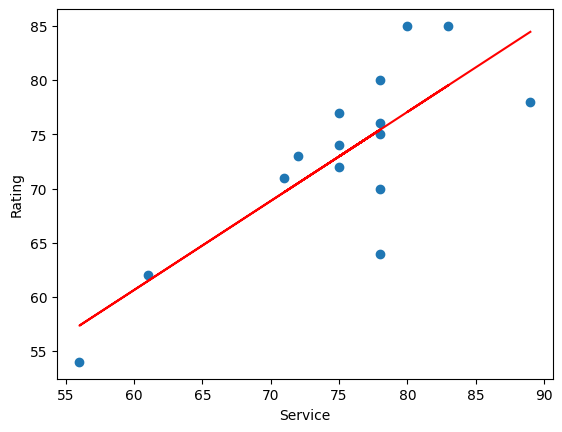

In [ ]:
#Visualize the relationship
plt.scatter(X.service, y)
plt.xlabel("Service")
plt.ylabel("Rating")
plt.plot(X.service, y_hat, "red")

**OLS Regression Results Model I and Model II Evaluation**

> R-Squared: Model I produced a higher value for the coefficient of determination than Model II, with a difference of approximately 0.069/7. Since 0.704, is closer to 1, than 0.635 this indicates that the prediction of the rating is better using Model I than Model II. Additionally, approximately 70% of the rating is explained by the food attribute.

Adj. R-squared and F-statistic and Prob (F-statistic) are not considered since these models use single independent features.

> Log-Likelihood: Model I = -43.404 has a larger value than Model II = -44.990. Thus, Model I is a better fit: it has a higher probability of observing data than Model II.

> AIC: Model I has a lower value than Model II, this indicates that Model I is a better model than Model II. However, we should also keep in mind that we are working with a low-data dataset and AIC is more appropriate when the data size is large. Model I produces a better tradeoff between the goodness of fit and the number of parameters of the model than Model II does.

> BIC: Model I has a lower BIC result than Model II. This indicates that Model I is a better prediction model than Model II and since BIC is more appropriate with small datasets like the RestaurantRatings dataset, this emphasizes Model I to be a better predictor than Model II.

> Standard Deviation: Model II has smaller values of standard error than Model I which indicates that Model II has smaller residual error compared to Model I. The difference is approximated to be const: 0.995 and service/food: 0.018. Thus, Model II has slightly fewer error/regression residual values that Model I.

> t-statistics: Model II produced a signifcance value of 4.754, this indicates that the independent variable 'service' is statistically significant in the regression model. Additionally Model I produced a signifcance value of 5.566, this indicates that the independent variable 'food' is statistically significant in the regression model.

> P > |t|: Both Model I and Model II produced coefficients that are statisticaly significant, because the p-value is less than the chosen level of significance indicated above [t-statistics]. Thus, the independent feature in both models is significantly associated with the dependent feature,'rating'.

> Confidence interval: Both Models represent a 97% confidence interval, thus, there is a 97% chance that the estimated regression coefficient lies within the interval.

> Omnibus and Prob(omnibus): Model I has greater significance value than Model II, thus, regression Model I as a whole significantly predicts the dependent feature better than Model II. Model I and Model II have p-values > 0.05, thus both models are not statistically significant, hence in both Models there is evidence that the independent features are not associated with the dependent feature.

> Skewness: Both Models have a skew < 0. Therefore, the symmetry of the distribution of the residents have a longer left tail for both models.

> Kurtosis: Both Models have a value of 3, thus the thickness of the residents of the the longer left tails is normal for both.

> Durbin - Watson: Model I has a value > 2, indicating that there is negative correlation between the residuals of the model. While, Model II has a value < 2, indicating that the model has a positive correlation between the residuals. Hence, both models are adequately capturing the underlying patterns of the data.

> Jarque-Bera: Both models have a small value of JB indicating the residuals of each model are normally distributed and they are each a good fit for the data.

> Condition Number: This is a simple linear regression model, so only one independent variable was used in building the model, thus multicollinearity cannot be measured.

**Conclusion**
> Both the Model I and Model II are simple linear regression models. The prediction of the models are average.
> Model I is a better predictor of the restaurant rating than Model II. This is because for the EDA 'food' has the highest positive correlation with rating.
> Model I could be improved to have a better prediction value for the restaurant's rating.

# Project B: Multiple Linear Regression

Model III: We will build a multiple linear regression model using y = 'rating' and x = 'food', and x = 'service' since they yield a positive correlation and the highest out of all the other features.

In [ ]:
#Extracting Independent Features: food and service
X_MR = res_Ratingmod[['food','service']]

In [ ]:
#Extracting Dependent Feature: rating
y = res_Ratingmod['rating']

In [ ]:
#Adding the constant value to the Independent Features
X_MR = sm.add_constant(X_MR)

In [ ]:
#Build MLR Model
ModelIII = sm.OLS(y, X_MR).fit()

In [ ]:
#Print the summary
print(ModelIII.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     20.42
Date:                Mon, 11 Mar 2024   Prob (F-statistic):           0.000137
Time:                        01:33:25   Log-Likelihood:                -41.429
No. Observations:                  15   AIC:                             88.86
Df Residuals:                      12   BIC:                             90.98
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.2532     12.942     -0.638      0.5

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


**Compare Model I, Model II and Model III**

> R-Squared: Model I produced a higher value of 0.704 for the coefficient of determination than Model II which has a  value of 0.635. Model III has a value of 0.773 which is the closest to 1 than ModelI and ModelII. This indicates that that the prediction of the rating is better using Model III than Model I and Model II.

> Adj. R-squared: Because R-squared is biased towards an increase in the number of independent features, when we considered the adjusted R - squared value: 0.735, Model III still has the highest value, making it the closest to 1 and thus a better predictor model, than the other two.

> F-statistic and Prob (F-statistic): Model III =  20.42, Model II = 22.60 and Model I = 30.98. Thus, the independent feature of Model I is significantly related to  'rating' than that of Model III and Model II.

> Log-Likelihood: Model I = -43.404, Model II = -44.990 and Model III = -41.429.
Thus, Model III is a better fit: it has a higher probability of observing data than Model II and Model II.

> AIC: Model I = 90.81, has a lower value than Model II = 93.98, this indicates that Model I is a better model than Model II. Model III = 88.86, Model III has the lowest AIC value of all the models. Thus, Model III produced a better model than Model I and Model II. However, we should also keep in mind that we are working with low-data dataset and AIC is more appropriate when the data size is large. Model III produces a better tradeoff between the goodness of fit and the number of parameters of the model than the simple linear models.

> BIC: Model I = 92.22 has a lower value than Model II = 95.40 and Model III = 90.98 has the lowest value of all models. This indicates that Model III is a better prediction model than Model II and Model I, since BIC is more appropriate with small datasets like the RestaurantRatings, this emphasizes Model III to be a better predictor.

> Standard Deviation: Model II has a smaller value of standard error than Model I which indicates that Model II has smaller residual error compared to Model I. The standard errors of the independent features is greater in Model III than in the other two models.

> t-statistics: Model II has a signifcance value of 4.754, this indicates that the independent variable 'service' is statistically significant in the model. Additionally Model I has a signifacance value of 5.566, this indicates that the independent variable 'food' is statistically significant in the model. While Model III has a signifcance value of: 'food' = 2.701, which is greater than 2 and 'service' = 1.901, which is less than 2. This indicates that 'food' is the most satistically significant independent feature of Model III.

> P > |t|: Both Model I and Model II produced coefficients that are statisticaly significant, because the p-value is less than the chosen level of significance. Thus, the independent feature in both models is significantly associated with the dependent feature,'rating'. In Model III the p-values for both food and service are lower than the chosen level of significance, thus the independent features are significantly associated with the dependent feature.

> Confidence interval: All 3 models represent a 97% confidence interval, thus, there is a 97% chance that the estimated regression coefficient lies within the interval.

> Omnibus and Prob(omnibus): All models have p-values > 0.05, the models are not statistically significant, hence each regression model as a whole does not significantly predict the dependent feature(s).

> Skewness: All models have a skew < 0. Therefore, the symmetry of the distribution of the residents have a longer left tail for all models.

> Kurtosis: All models have a value of 3, thus the thickness of the residents of the the longer left tails is normal all models.

> Durbin - Watson: Model I and Model III have a value > 2, indicating that there is negative correlation between the residuals of the model. While, Model II has a value < 2, indicating that the model has a positive correlation between the residuals. Hence, all models are adequately capturing the underlying patterns of the data.

> Jarque-Bera: All models have small values of JB indicating the residuals of each model are normally distributed and they are each a good fit for the data.

> Condition Number: Model III has a low value of condition number. Thus, the independent features of the model have a low measure of multicolinearity.

In [ ]:
#Printing the parameters
print(ModelIII.params)

const     -8.253248
food       0.700379
service    0.400606
dtype: float64


**Conclusion**
> Model III is a better predictor model for approximating the restaurant rating than Model I and Model II. This indicates that Multiple Linear Regression is a better prediction algorithm than Simple linear regression that uses one independent feature.

**Conclusion**


# Project C: Ridge and Lasso Regularization

Since we have predicted models using Simple Linear Regression and Multiple Linear Regression. We will build models using regularization to compare the accuracy of the different models.

From the EDA, the features with correlation with 'rating' are 'food' and 'service'. While 'ambience' showed little to no correlation with the target/'rating'.



In [ ]:
#Extract Independent Features
X = res_Ratingmod[['food','service','ambience']]
X.shape

(15, 3)

In [ ]:
#Extract Dependent Feature
y = res_Ratingmod['rating']
y.shape

(15,)

In [ ]:
#Dividing the Dataset into Training and Test Sets for Evaluation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
#Build Ridge, Lasso, Regression Models
lasso_model = linear_model.Lasso(alpha = 0.1)
ridge_model = linear_model.Ridge(alpha = 0.1)

In [ ]:
#Train the Models
lasso_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)

Ridge(alpha=0.1)

In [ ]:
#Look at Regression coefficients
print(f"Lasso_Regression {lasso_model.coef_}")
print(f"Ridge_Regression {ridge_model.coef_}")

In [ ]:
# Look at the R-squared Metric for the trained Models
r2_lasso_train = lasso_model.score(X_train, y_train)
r2_ridge_train = ridge_model.score(X_train, y_train)

print(f"Lasso-train {r2_lasso_train} ")
print(f"Ridge-train {r2_ridge_train} ")

**Trained Regularization Models Evaluation**

> The regularization models both have a value of 0.759, which is close to 1. This indicates that the regression lines fit the data points well.

In [ ]:
# R-squared Metric for the Test Set
r2_lasso = lasso_model.score(X_test, y_test)
r2_ridge = ridge_model.score(X_test, y_test)

print(f"Lasso_test {r2_lasso} ")
print(f"Ridge_test {r2_ridge} ")

**Evaluation of R-quared of the Regularization Models**

> The models both have a value of 0.961 for the r-squared metric approximation. This indicates that the models predict the test data well.

Info:
> The models prediction approximation in general is 0.202 / 20% better than the trained model. This indicates that the model is a reliable prediction model for the 'rating' of the restaurant based on all the dependent features.

In [ ]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error
mse_lasso = mean_squared_error(y_test, lasso_model.predict(X_test))
print(f"Lasso {mse_lasso}")

mse_ridge = mean_squared_error(y_test, ridge_model.predict(X_test))
print(f"Ridge {mse_ridge}")

**Evaluation of Mean Squared Error of the Regularization Models**

> The lasso regularization model has a mean squared error value of 1.481 and the ridge regularization has a value of 1.443 frot he mean squared error.

 Info:
 >  Both models have a mean squared error value of 1, which is low and indicates that the models perform well, with a small value of erros between the predicted and actual values.

In [ ]:
# Mean Absolute Error
from sklearn.metrics import mean_absolute_error
mae_lasso = mean_absolute_error(y_test, lasso_model.predict(X_test))
print(f" Lasso {mae_lasso}")

mae_ridge = mean_absolute_error(y_test, ridge_model.predict(X_test))
print(f" Ridge {mae_ridge}")

**Evaluation of Mean Absolute Error of the Regularization Models**

> The lasso regularization model has a mean absolute value of 0.846 and the ridge regularization model has a mean absolute value of 0.834.

Info:
> The average of the absolute differences between the predicted and actual values for both the ridge and lasso regularization model is approximately
0.8: the average magnitude if the error between the predicted 'rating' and the actual 'rating' with both models is 0.8.
> Both models performance is clsoe to perfect in predicting the 'rating' of a restaurant.

Note:

> We will be developing another Multiple Regression Model using the same features as the one in Model III. This is because we want to campare the prediction performance of the Multiple Linear Regression model with that of the Regularization models and in order to effictively match the criteria of the building of the models, we will use the same building techiques for all, which is split the data into training and testing data.

In [ ]:
# Extract the Independent features and Dependent feature.
X = res_Ratingmod [['food','service']]
y = res_Ratingmod ['rating']

In [ ]:
#Adding the constant value to the Independent Features
X = sm.add_constant(X)

#Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
#Fit the model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

MLR = LinearRegression()
MLR.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Make predcitions on the testing set
MLR_predict = MLR.predict(X_test)

In [ ]:
#Evaluating the Model
mse = mean_squared_error(y_test, MLR_predict)
print("Mean squared error:", mse)

mae = mean_absolute_error(y_test, MLR_predict)
print("Mean absolute error:", mae)

r_squared = r2_score(y_test, MLR_predict)
print("R-squared: ", r_squared)

**Evaluation of Multiple Linear Regression Model**

> The multiple linear regression model has a mean squared error value of
54.964, a mean absolute erro value of 7.198 and r-squared value of 0.439.

Info:
> The multtiple linear regression model has a low performance. The differences between the model's predictions and the actual values are high - MSE: 54.964 and the MAE: 7.198 [is relatively lower than the MSE because it provides a measure of the average magnitude of the error in the predictions of the model in relation to the actual values]. This indicates that outliers in the data sufficiently affect the MSE evaluation. However, it stays that the model's performance is poor.

>  The r-squared metric of the model is 0.439, this indicates that the model cannot predict the 'rating' value of a the restaurant.

**Comparison of MLR and Regularization Models**

> For the regularization models: ridge and lasso regrssion model have a strong coefficient of determination - r-squared value of 0.961, which is close to perfect prediction of the tested models. Additionally, the mean squared and mean absolute error evaluation of the perfomrance of the regularization models is very low erro values between the model's prediction of the restaurant rating the actual rating. Thus, the regularization models produce little error in predicting the rating of a restaurant.

> It is important to note the distinctiuon between the two models, the ridge model regularization is a slightly better performance model than the lass regularization model. In all the metric evaluations of the models, te ridge model slightly produces better evaluation values than the lasso model.

> For the multiple linear regression model, MLR, the models prediction perfromance is very low compared to those of the regularization models. The errors of the MLR model prediction are way higher than that of the regularization models and the r-squared value is way lower compared to the regularization metrics.


**Conclusion**
> The Regularization models produced better performance than the MLR model. Though the MLR model use only the independent feautures with strong correlation with the dependent features.

> The Ridge regression model is a better predicting model than all the models in this lab for the restaurant rating and it considers all the dependent features.

In [ ]:
# Colab2PDF v1.0.4 by Drengskapur (github.com/drengskapur/colab2pdf) (License: GPL-3.0-or-later)
# @title {display-mode:"form"}
# @markdown ⬇️ Download PDF
def colab2pdf():
    ENABLE=True # @param {type:"boolean"}
    if ENABLE:
        !apt-get install librsvg2-bin
        import os, datetime, json, locale, pathlib, urllib, requests, werkzeug, nbformat, google, yaml, warnings
        locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')
        NAME = pathlib.Path(werkzeug.utils.secure_filename(urllib.parse.unquote(requests.get(f"http://{os.environ['COLAB_JUPYTER_IP']}:{os.environ['KMP_TARGET_PORT']}/api/sessions").json()[0]["name"])))
        TEMP = pathlib.Path("/content/pdfs") / f"{datetime.datetime.now().strftime('%Y%m%d_%H%M%S')}_{NAME.stem}"; TEMP.mkdir(parents=True, exist_ok=True)
        NB = [cell for cell in nbformat.reads(json.dumps(google.colab._message.blocking_request("get_ipynb", timeout_sec=600)["ipynb"]), as_version=4).cells if "--Colab2PDF" not in cell.source]
        warnings.filterwarnings('ignore', category=nbformat.validator.MissingIDFieldWarning)
        with (TEMP / f"{NAME.stem}.ipynb").open("w", encoding="utf-8") as nb_copy: nbformat.write(nbformat.v4.new_notebook(cells=NB or [nbformat.v4.new_code_cell("#")]), nb_copy)
        if not pathlib.Path("/usr/local/bin/quarto").exists():
            !wget -q "https://quarto.org/download/latest/quarto-linux-amd64.deb" -P {TEMP} && dpkg -i {TEMP}/quarto-linux-amd64.deb > /dev/null && quarto install tinytex --update-path --quiet
        with (TEMP / "config.yml").open("w", encoding="utf-8") as file: yaml.dump({'include-in-header': [{"text": r"\usepackage{fvextra}\DefineVerbatimEnvironment{Highlighting}{Verbatim}{breaksymbolleft={},showspaces=false,showtabs=false,breaklines,breakanywhere,commandchars=\\\{\}}"}],'include-before-body': [{"text": r"\DefineVerbatimEnvironment{verbatim}{Verbatim}{breaksymbolleft={},showspaces=false,showtabs=false,breaklines}"}]}, file)
        !quarto render {TEMP}/{NAME.stem}.ipynb --metadata-file={TEMP}/config.yml --to pdf -M latex-auto-install -M margin-top=1in -M margin-bottom=1in -M margin-left=1in -M margin-right=1in --quiet
        google.colab.files.download(str(TEMP / f"{NAME.stem}.pdf"))
colab2pdf()

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  librsvg2-bin
0 upgraded, 1 newly installed, 0 to remove and 38 not upgraded.
Need to get 1,871 kB of archives.
After this operation, 6,019 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 librsvg2-bin amd64 2.52.5+dfsg-3ubuntu0.2 [1,871 kB]
Fetched 1,871 kB in 0s (4,581 kB/s)
Selecting previously unselected package librsvg2-bin.
(Reading database ... 121752 files and directories currently installed.)
Preparing to unpack .../librsvg2-bin_2.52.5+dfsg-3ubuntu0.2_amd64.deb ...
Unpacking librsvg2-bin (2.52.5+dfsg-3ubuntu0.2) ...
Setting up librsvg2-bin (2.52.5+dfsg-3ubuntu0.2) ...
Processing triggers for man-db (2.10.2-1) ...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>